# Spam Filter
Using <a href="https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection">University of California, Irvine's Machine Learning Repository's SMS Spam Collection</a>, with Bag of Words, TFIDF, and Naive Bayes Classifier, to detect spam vs ham messages.

In [2]:
import nltk

In [3]:
#Downloading the stopwords corpus to filter out common words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd

In [5]:
#Read data (tab-separated)
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [6]:
#Imports for text processing
import string
import nltk
from nltk.corpus import stopwords

In [7]:
#Function for text processing: remove punctuation, split into individual words, remove stopwords
def text_process(mess):
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    no_punc = no_punc.split()
    new_mess = [word for word in no_punc if word not in stopwords.words('english')]
    return new_mess

In [13]:
#Apply text processing function
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
5567    [This, 2nd, time, tried, 2, contact, u, U, £75...
5568             [Will, ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [The, guy, bitching, I, acted, like, id, inter...
5571                              [Rofl, Its, true, name]
Name: message, Length: 5572, dtype: object

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud

def show_wordcloud(data, title):
    text = ' '.join(data['message'].astype(str).tolist())
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords.words('english'),background_color='grey',
                    colormap='rainbow', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

In [41]:
data_ham  = messages[messages['label'] == 'ham'].copy()
data_spam  = messages[messages['label'] == 'spam'].copy()

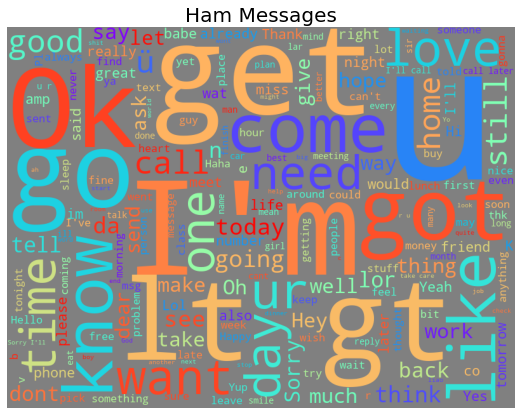

In [49]:
show_wordcloud(data_ham, 'Ham Messages')

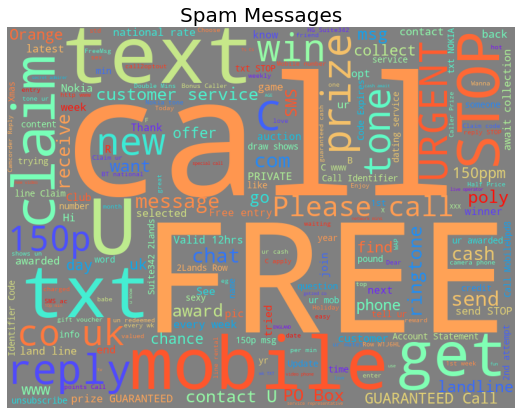

In [50]:
show_wordcloud(data_spam, 'Spam Messages')

In [9]:
#Load sklearn packages for modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [13]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [14]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [15]:
predictions = pipeline.predict(msg_test)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1426
        spam       1.00      0.67      0.81       246

    accuracy                           0.95      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.95      0.95      0.95      1672

